<h1> Importing Libraries and Real Estate Data Set</h1>

In [114]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
#read real estate data set

df = pd.read_excel("data.xlsx")

<h4>Shape of data set</h4>

In [116]:
df.shape

(414, 8)

<h4>First 5 rows</h4>

In [117]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<h4>Last 5 rows</h4>

In [118]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


<h4>Description of dataset</h4>

In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.000000,104.250000,207.500000,310.750000,414.000000
X1 transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
X2 house age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
X4 number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
X5 latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
X6 longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Y house price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


<h2>Data Cleaning</h2>

In [120]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [121]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

No null values in the dataset

In [122]:
print(df.shape)
df.drop_duplicates()
df.shape

(414, 8)


(414, 8)

No duplicates

In [123]:
#dropping unnecessary "No" and "X1 transaction date" columns because we already have house age

df = df.drop(['X1 transaction date'], axis=1)
df = df.drop(['No'], axis=1)

<h2>Data Exploration</h2>

In [124]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [125]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


We can easily see that Targer "Y house price of unit area" does not depend upon "X2 house age" and "X3 distance to the nearest MRT station"

It is corrleated to the location of the house(latitude and longitude) and number of convenience stores

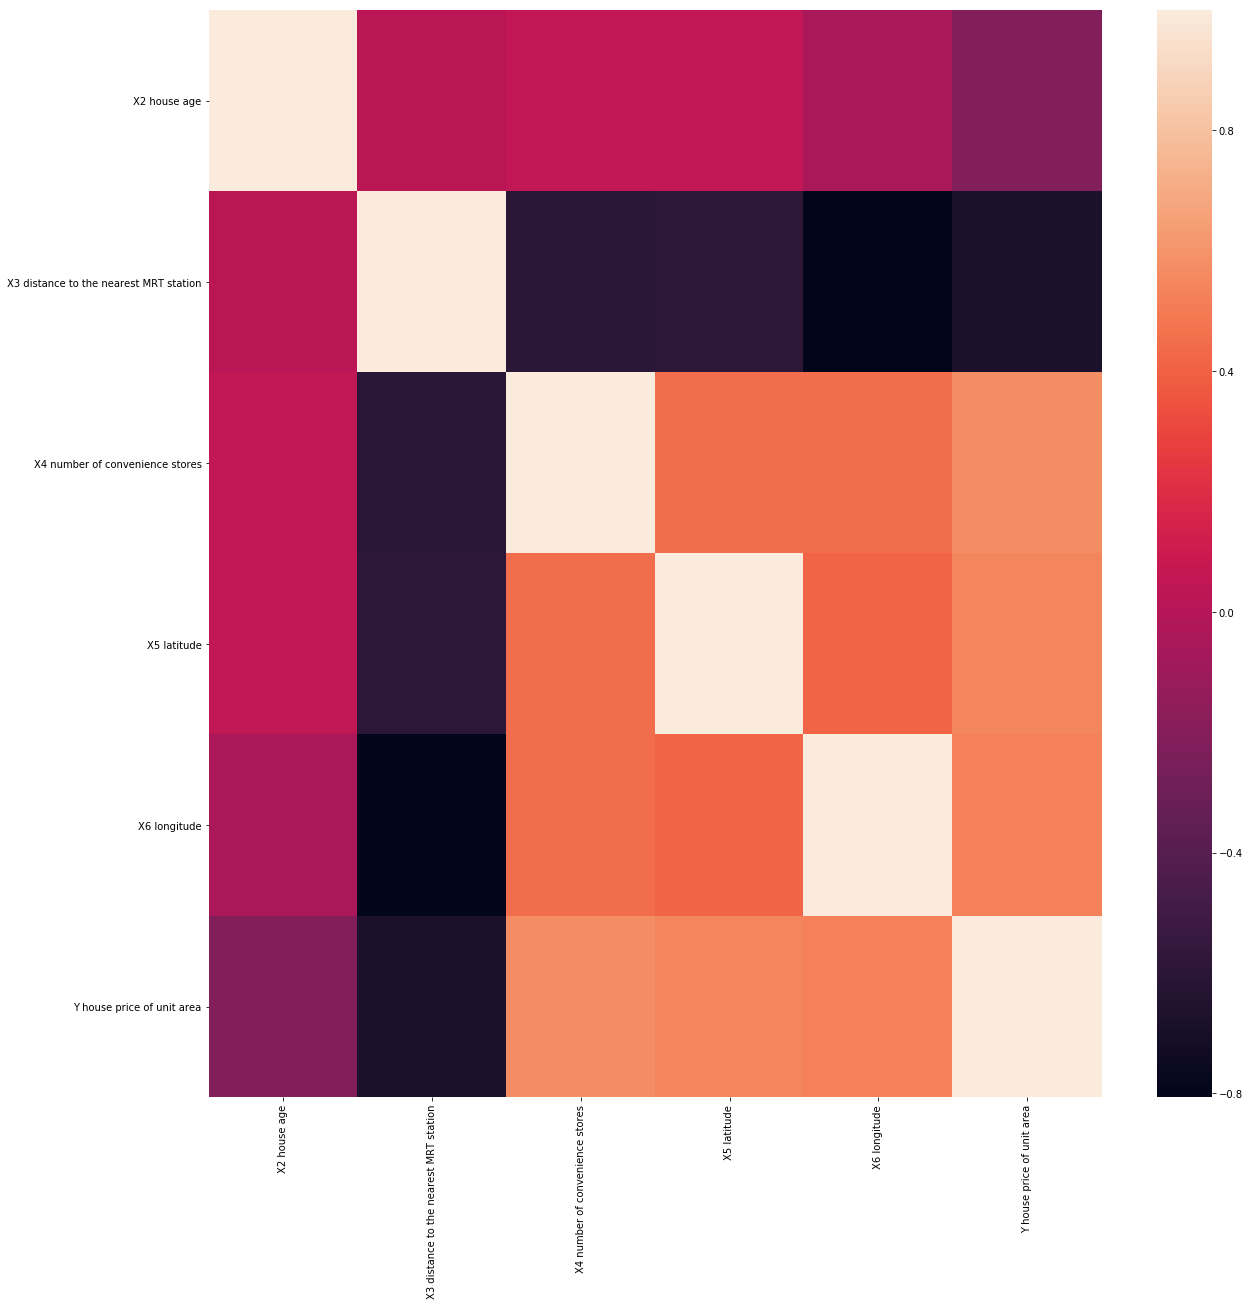

In [126]:
#Let's plot a heat map see what is going on

plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

Clearly, we can see the house price is positively correlated with number of convenience store and latitude and longitude

<h2>Removing outliers</h2>

In [127]:
#first change these big column names

df.columns = ['house_age', 'nearest_MRT', 'convinience_stores', 'latitude', 'longitude', 'house_price']

In [128]:
df.head()

,house_age,nearest_MRT,convinience_stores,latitude,longitude,house_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


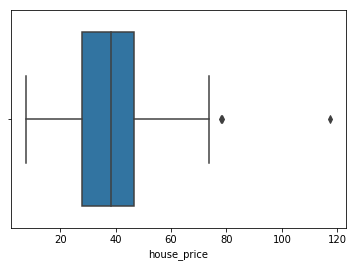

In [129]:
sns.boxplot(df.house_price)

In [130]:
df.house_price.sort_values(ascending=False).head()

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
Name: house_price, dtype: float64

In [131]:
## Remove observations with house_price greater than 80.
df = df[df.house_price <= 80]
df.shape

(413, 6)

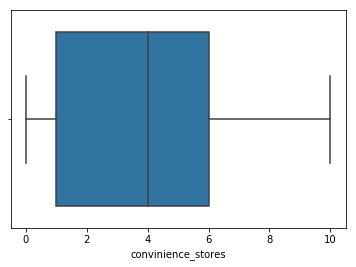

In [132]:
sns.boxplot(df.convinience_stores)

<h2>Machine learning models</h2>

###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [133]:
# Create separate object for target variable
y = df['house_price']
# Create separate object for input features
x = df.drop(['house_price', 'house_age', 'nearest_MRT'], axis=1)

In [136]:
# Split X and y into train and test sets: 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [137]:
x_train.describe()

,convinience_stores,latitude,longitude
count,330.000000,330.000000,330.000000
mean,4.078788,24.969088,121.533345
std,2.961738,0.012329,0.015692
min,0.000000,24.932070,121.473530
25%,1.000000,24.963000,121.528085
50%,4.000000,24.971100,121.538685
75%,6.000000,24.978093,121.543480
max,10.000000,25.014590,121.566270


### Data standardization

In [138]:
train_mean = x_train.mean()
train_std = x_train.std()

# Standardize the train data set
x_train = (x_train - train_mean) / train_std

# Check for mean and std dev.
x_train.describe()

,convinience_stores,latitude,longitude
count,3.300000e+02,3.300000e+02,3.300000e+02
mean,-5.736152e-17,6.514032e-13,3.924544e-13
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.377160e+00,-3.002375e+00,-3.811953e+00
25%,-1.039521e+00,-4.937475e-01,-3.352360e-01
50%,-2.660191e-02,1.632160e-01,3.402879e-01
75%,6.486774e-01,7.303539e-01,6.458668e-01
max,1.999236e+00,3.690542e+00,2.098243e+00


In [139]:
#We use train_mean and train_std_dev to standardize test data set
x_test = (x_test - train_mean) / train_std

#Check for mean and std dev. - not exactly 0 and 1
x_test.describe()

,convinience_stores,latitude,longitude
count,83.000000,83.000000,83.000000
mean,0.038485,-0.028674,0.007213
std,0.977233,1.042792,0.897388
min,-1.377160,-2.875849,-2.366587
25%,-0.701881,-0.492125,-0.304328
50%,-0.026602,0.095086,0.272417
75%,0.648677,0.618224,0.621650
max,1.999236,1.822657,1.675722


In [111]:
reg=LogisticRegression(random_state=10,C=20)

mod=reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)

##  Model-1 Ridge Regression

In [141]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [142]:
model.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [144]:
## Predict Test results
y_pred = model.predict(X_test)

In [146]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  538.6972361771782
Mean Absolute Error:  538.5712088346869


In [147]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  539.0488389407832
Mean Absolute Error:  538.9494116405345


#### Building the model again with the best hyperparameters

In [150]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
convinience_stores
longitude
latitude


##  Model-2 Support Vector Regression
With an RBF Kernel

In [152]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 2 minutes

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [153]:
model.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10000,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Building the model again with the best hyperparameters

In [154]:
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [155]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [156]:
## Predict Test results
y_pred = model.predict(X_test)

In [157]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  8.6665545036835
Mean Absolute Error:  6.199572825450265


In [158]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  8.808259672252724
Mean Absolute Error:  6.494336726234055


## Model-3 Random Forest Regression

In [159]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [160]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [161]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [162]:
## Predict Test results
y_pred = model.predict(X_test)

In [164]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  4.013403761509994
Mean Absolute Error:  2.9726480836082145


In [166]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  6.036794511949029
Mean Absolute Error:  4.34500236788706


In [167]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Building the model again with the best hyperparameters

In [169]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
latitude
longitude
convinience_stores
